# Notebook Demonstrating chosen Image Similarity Measures

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
from image_similarity_measures.quality_metrics import ssim,psnr,sre,rmse
import numpy as np

In [122]:
imgs = dict()
for i in os.listdir("flower"):
    img = Image.open(os.path.join("flower",i))
    imgs[i.split(".")[0]] = img

In [123]:
imgs.keys()

dict_keys(['brighter-lower-contrast', 'brighter', 'crystalised', 'fog', 'hue', 'noise-strong', 'noise-weak', 'original'])

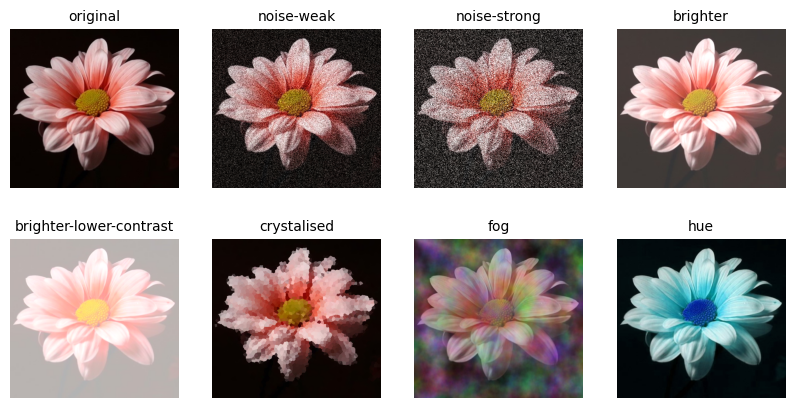

In [124]:
fig,axs = plt.subplots(nrows=2,ncols=4,figsize=(10,5))
for i,ax in zip(["original",'noise-weak','noise-strong','brighter','brighter-lower-contrast','crystalised','fog','hue'],
                axs.flatten()):
    ax.imshow(imgs[i])
    ax.axis("off")
    ax.set_title(i,fontsize=10)
fig.savefig("./flower-all.png",dpi=300)

In [125]:
for i in imgs:
    imgs[i] = np.array(imgs[i])

In [128]:
psnr_arr = []
ssim_arr = []
sre_arr = []
rmse_arr = []
for i in ["original",'noise-weak','noise-strong','brighter','brighter-lower-contrast','crystalised','fog','hue']:
    psnr_arr.append(psnr(imgs['original'],imgs[i]))
    ssim_arr.append(ssim(imgs['original'],imgs[i]))
    sre_arr.append(sre(imgs['original'],imgs[i]))
    rmse_arr.append(rmse(imgs['original'],imgs[i]))
psnr_arr = np.array(psnr_arr)
ssim_arr = np.array(ssim_arr)
sre_arr = np.array(sre_arr)
rmse_arr = np.array(rmse_arr)
sre_arr.shape,psnr_arr.shape

((8,), (8,))

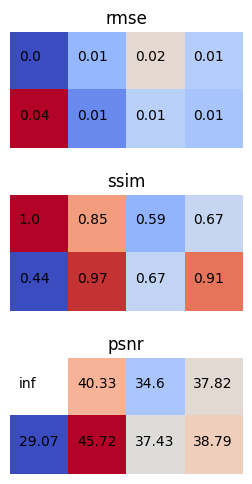

In [133]:
fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(3,6))
for title,arr,ax in zip(['rmse','ssim','psnr'],[rmse_arr,ssim_arr,psnr_arr,sre_arr],axs):
    ax.imshow(arr.reshape((2,4)),cmap='coolwarm')
    for val,coord in zip(arr,[[0.5,0.5],[0.5,1.5],[0.5,2.5],[0.5,3.5],[1.5,0.5],[1.5,1.5],[1.5,2.5],[1.5,3.5]]):
        ax.text(coord[1]-0.85,coord[0]-0.5,round(val,2))
    ax.set_title(title)
    ax.axis("off")
fig.savefig("./measures.png",dpi=250)